In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"E:\DOCUMENTS\datasets\Bengaluru_House_Data.csv")
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.shape

(13320, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


Here,Price(in lakhs) is the dependent variable and the rest are independent variable.I need to build a model that can predict the property price based on certain features such as square feet, bedroom ,bathroom, location etc

In [5]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [6]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

The features 'area_type', 'availability', 'society','balcony' are not necessary,Hence we are dropping it

In [7]:
df1=df.drop([ 'area_type', 'availability', 'society','balcony'],axis=1)
df1.head(5)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


# #Data cleaning

In [8]:
#checking for null values
df1.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [9]:
df2=df1.dropna()

In [10]:
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [11]:
#the values in size column are different.To handle this 
df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))

C:\Users\USER\AppData\Local\Temp\ipykernel_18272\2569999984.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk']=df2['size'].apply(lambda x:int(x.split(' ')[0]))


In [12]:
df2.bhk.unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [13]:
df2.drop(columns='size',axis=1)

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056,2.0,39.07,2
1,Chikka Tirupathi,2600,5.0,120.00,4
2,Uttarahalli,1440,2.0,62.00,3
3,Lingadheeranahalli,1521,3.0,95.00,3
4,Kothanur,1200,2.0,51.00,2
...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5
13316,Richards Town,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2
13318,Padmanabhanagar,4689,4.0,488.00,4


In [14]:
df2.head(5)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [15]:
df2[df2.bhk>10]

,location,size,total_sqft,bath,price,bhk
459,1 Giri Nagar,11 BHK,5000,9.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,170.0,11
3379,1Hanuman Nagar,19 BHK,2000,16.0,490.0,19
3609,Koramangala Industrial Layout,16 BHK,10000,16.0,550.0,16
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,300.0,12
7979,1 Immadihalli,11 BHK,6000,12.0,150.0,11


#here we can see that there is something issue with the number of bedrooms because it showing 27,43 for small sqft.inorder to deal with


In [16]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [17]:
#we can see that,there are some variations in sqft column,like '1133 - 1384'.so inorder to deal with this we are using try except
def is_float(x):
    try:
        float(x) #checking for float values
    except:
        return False #interval sqft will be seen
    return True 

In [18]:
df2[df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [19]:
df2[~df2['total_sqft'].apply(is_float)].head(10) #false values

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [20]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None  

In [21]:
df3 = df2.copy()
df3.total_sqft = df3.total_sqft.apply(convert_sqft_to_num)

df3.head(10)

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [22]:
df3.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
bhk                 1
Name: 410, dtype: object

In [23]:
df3.shape

(13246, 6)

In [24]:
df3 = df3[df3.total_sqft.notnull()]

In [25]:
df3.shape

(13200, 6)

# feature engineering

In [26]:
#creating new feature price per sqft for outlier detection
df4=df3.copy()
df4['Price_per_sqft']=round(df4.price*100000/df4.total_sqft,2)
df4.head(5)

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00


In [27]:
df4.location.unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [28]:
len(df4.location.unique())

1298

here,The feature "location" is a categorical variable, we can see there are 1200+ locations are there.inorder to do label enoding or one hot encoding there will dimensionality problem occurs.
we have to find number of datas for each location

In [29]:
df4.location=df4.location.apply(lambda x:x.strip())

In [30]:
loc_count=df4['location'].value_counts()

In [31]:
loc_count

Whitefield                   533
Sarjapur  Road               392
Electronic City              304
Kanakpura Road               264
Thanisandra                  235
                            ... 
Rajanna Layout                 1
Subramanyanagar                1
Lakshmipura Vidyaanyapura      1
Malur Hosur Road               1
Abshot Layout                  1
Name: location, Length: 1287, dtype: int64

In [32]:
len(loc_count)

1287

In [33]:
len(loc_count[loc_count<=10])

1047

In [34]:
Others = loc_count[loc_count<=10]
Others

BTM 1st Stage                10
Gunjur Palya                 10
Nagappa Reddy Layout         10
Sector 1 HSR Layout          10
Thyagaraja Nagar             10
                             ..
Rajanna Layout                1
Subramanyanagar               1
Lakshmipura Vidyaanyapura     1
Malur Hosur Road              1
Abshot Layout                 1
Name: location, Length: 1047, dtype: int64

In [35]:
df4.location=df4.location.apply(lambda x:'other' if x in Others else x)

In [36]:
df4.head(10)

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.81
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.38
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.56
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.89
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.00
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.86
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.06
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.82
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51


In [37]:
len(df4.location.unique())

241

Minimum threshold per bhk to be 450 sqft.Therefore we need to find it and rest will be considered as outliers.

In [38]:
df4[df4.total_sqft/df4.bhk<450].head(5)

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.24
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.51
16,Bisuvanahalli,3 BHK,1180.0,3.0,48.00,3,4067.80
25,other,3 BHK,1250.0,3.0,56.00,3,4480.00
26,Electronic City,2 BHK,660.0,1.0,23.10,2,3500.00


In [39]:
df4.shape

(13200, 7)

In [40]:
df5 = df4[~(df4.total_sqft/df4.bhk<300)]
df5.shape

(12456, 7)

In [41]:
df5.Price_per_sqft.describe()

count     12456.000000
mean       6308.502836
std        4168.127366
min         267.830000
25%        4210.530000
50%        5294.120000
75%        6916.670000
max      176470.590000
Name: Price_per_sqft, dtype: float64

we can see that min value for the price per sqft is 267.83 and max value is 176470.59 which is unlikely,it might be outliers.Because in banglore,the price will is 2,000 ‑ 16,000 / sqft.We have to remove that also

inorder to remove these anomalies we are performing a function.So,we are assuming that our dataset is in normal distribution so that we can remove these extreme cases using std_dev and mean.We know,in normal distribution 68% of the data points will be lie between one standard deviation and mean.

In [42]:
#we have to find remove anomalies per location
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.Price_per_sqft)
        st = np.std(subdf.Price_per_sqft)
        reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)
df6.shape

(10242, 7)

In [43]:
df6.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.54
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.33
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81


subdf is a temporary DataFrame that holds data for a specific location group during the loop iteration. It's a way to isolate and work with data from each location separately, which is crucial for performing location-specific calculations and operations.

In [44]:
#removing outliers from df5
df7 = remove_pps_outliers(df6)
df7.shape

(6964, 7)

there were close to 2000 outliers and removed

In [45]:
df7.Price_per_sqft.describe()

count     6964.000000
mean      5413.898308
std       1796.749722
min       2439.020000
25%       4334.267500
50%       5106.380000
75%       6071.430000
max      24166.670000
Name: Price_per_sqft, dtype: float64

In [46]:
df7.location.value_counts()

other                    1740
Whitefield                312
Sarjapur  Road            173
Electronic City           151
Raja Rajeshwari Nagar     128
                         ... 
Vishwapriya Layout          2
Marsur                      2
Laggere                     2
HAL 2nd Stage               2
Vishveshwarya Layout        2
Name: location, Length: 241, dtype: int64

In [47]:
#We have to check for prices for 2 and 3 bhk for the almost same sqft

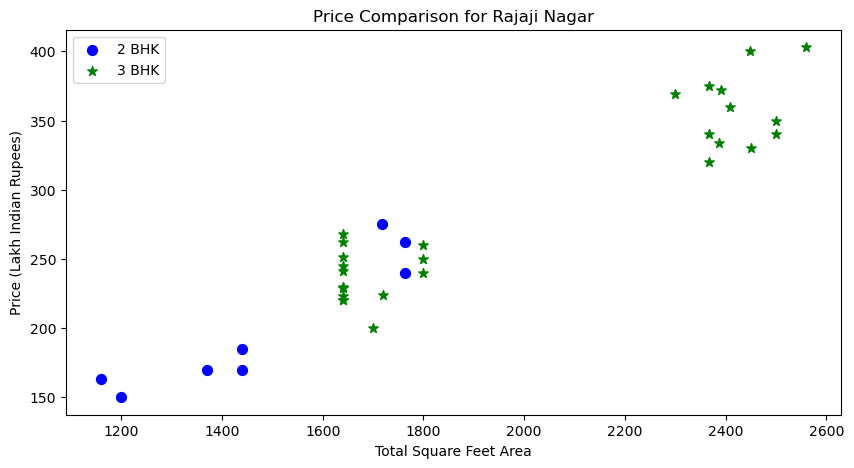

In [48]:
def plot_scatter(df, location):
    # Filter data for 2 BHK and 3 BHK apartments in the specified location
    bhk2 = df[(df.location == location) & (df.bhk == 2)]
    bhk3 = df[(df.location == location) & (df.bhk == 3)]
    plt.figure(figsize=(10,5))
    
    # Plot 2 BHK apartments as blue dots
    plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK', marker='o', s=50)
    
    # Plot 3 BHK apartments as green crosses
    plt.scatter(bhk3.total_sqft, bhk3.price, color='green', label='3 BHK', marker='*', s=50)
    
    # Set labels and title
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(f"Price Comparison for {location}")
    plt.legend()
    plt.show()
plot_scatter(df7, "Rajaji Nagar")


we can see that for the same sqft,the price for the 2bhk is higher than 3 bhk.

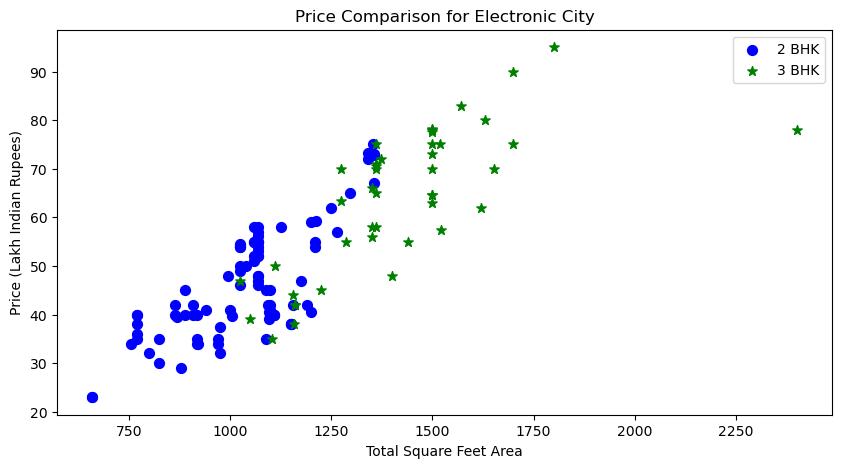

In [49]:
plot_scatter(df7, "Electronic City")

We need to create a function,which wil do If a property's price per square foot is significantly lower than the mean of the previous BHK category, it is considered an outlier and removed from the DataFrame.

In [50]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    
    # Iterate through each location
    for location in df['location'].unique():
        location_df = df[df['location'] == location]
        
        bhk_stats = {}
        
        # Calculate statistics for each BHK category within the location
        for bhk in location_df['bhk'].unique():
            bhk_df = location_df[location_df['bhk'] == bhk]
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df['Price_per_sqft']),
                'std': np.std(bhk_df['Price_per_sqft']),
                'count': bhk_df.shape[0]
            }
        
        # Iterate through each BHK category within the location
        for bhk in location_df['bhk'].unique():
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count'] > 5:
                low_price_indices = location_df[
                    (location_df['bhk'] == bhk) & (location_df['Price_per_sqft'] < stats['mean'])
                ].index.values
                exclude_indices = np.append(exclude_indices, low_price_indices)
    
    # Remove outlier indices and return the cleaned DataFrame
    return df.drop(exclude_indices, axis='index')

# Call the function to remove outliers and store the cleaned DataFrame in df8
df8 = remove_bhk_outliers(df7)
print(df8.shape)  # Print the shape of the cleaned DataFrame


(4973, 7)


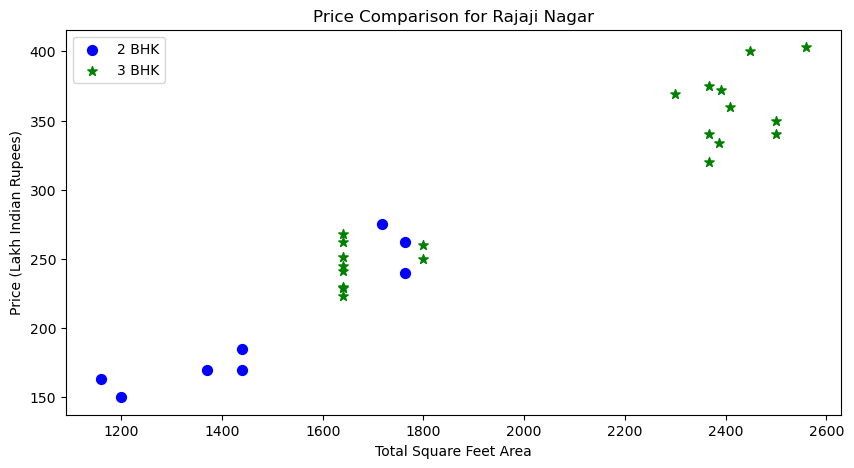

In [51]:
plot_scatter(df8, "Rajaji Nagar")

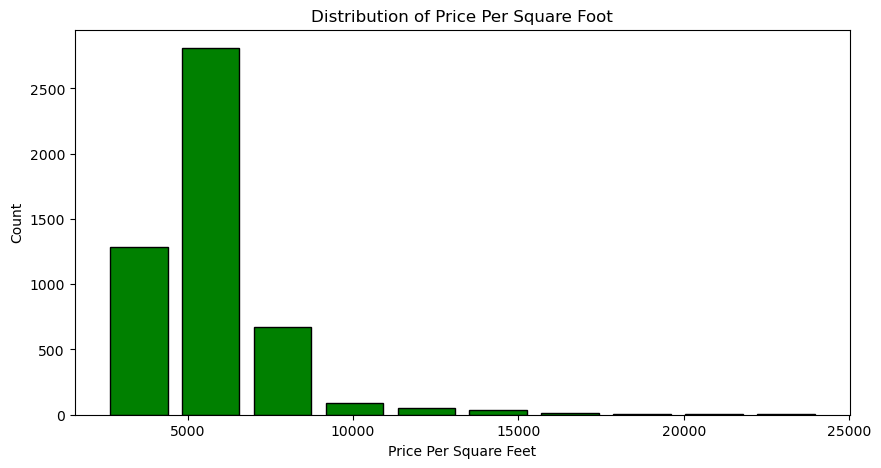

In [52]:
# Create a histogram of price_per_sqft
plt.figure(figsize=(10,5))
plt.hist(df8['Price_per_sqft'], rwidth=0.8, color='green', edgecolor='black')
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")
plt.title("Distribution of Price Per Square Foot")
plt.show()


This is a normal distribution where 0 to 10000 price per sqft will bbe have more number of data points

In [53]:
#Outlier detection for bathroom counts 

In [54]:
df8.bath.unique()

array([ 3.,  2.,  4.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [55]:
#checking for the bathroom counts for bhk
df8[df8.bath>df8.bhk+2]

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
1118,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.03
4411,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.03


The bathrooms counts more than bhk count,it can be seen as outliers

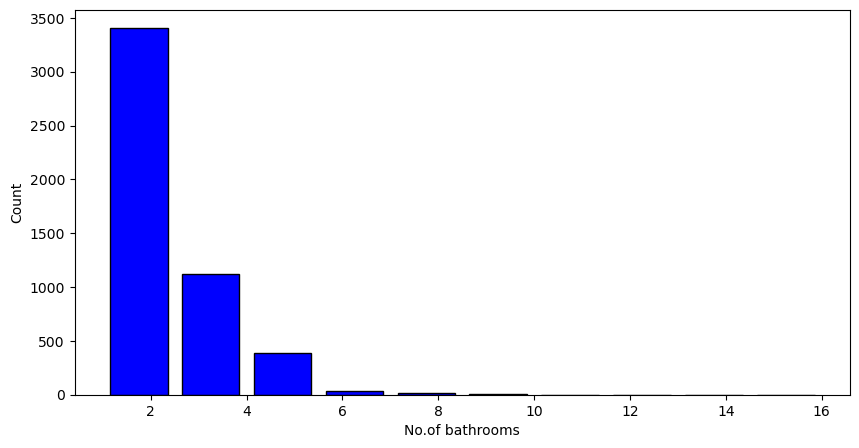

In [56]:
plt.figure(figsize=(10,5))
plt.hist(df8['bath'], rwidth=0.8, color='blue', edgecolor='black')
plt.xlabel("No.of bathrooms")
plt.ylabel("Count")
plt.show()

In [57]:
df8.shape

(4973, 7)

In [58]:
df8.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
1,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
2,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81
3,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.56
4,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.67


In [59]:
df9 = df8[df8.bath<df8.bhk+2]
df9.shape

(4945, 7)

In [60]:
df9.head()

,location,size,total_sqft,bath,price,bhk,Price_per_sqft
0,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.84
1,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.33
2,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.81
3,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.56
4,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.67


In [61]:
df10=df9.drop(['Price_per_sqft','size'],axis=1)
df10.head(3)

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,1630.0,3.0,194.0,3
1,1st Block Jayanagar,1875.0,2.0,235.0,3
2,1st Block Jayanagar,1235.0,2.0,148.0,2


In [62]:
#one hot encoding for "location" feature
df_encoded = pd.get_dummies(df10.location)
df_encoded.head(3)

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
df11= pd.concat([df10,df_encoded.drop('other',axis=1)],axis=1)
df11.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Phase JP Nagar,2825.0,4.0,250.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [64]:
df12=df11.drop('location',axis=1)
df12.head(5)

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2825.0,4.0,250.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
df12.columns.value_counts

<bound method IndexOpsMixin.value_counts of Index(['total_sqft', 'bath', 'price', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)>

In [66]:
df12.shape

(4945, 244)

In [67]:
#Get ready to build the Model
X=df12.drop('price',axis=1)
X.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
X.shape

(4945, 243)

In [69]:
Y=df12.price
Y.head(3)

0    194.0
1    235.0
2    148.0
Name: price, dtype: float64

In [70]:
Y.shape

(4945,)

In [71]:
#splitting into train and test dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

0.9273581909679838

Here,we are going to evaluate the ML model using K fold cross validation.
Cross-validation is a technique for evaluating ML models by training several ML models on subsets of the available input data and evaluating them on the complementary subset of the data. Use cross-validation to detect overfitting

creating a shuffle split for my cross-validation shuffle split will randomize my samples so that each of the fold have equal distribution

In [73]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.94986088, 0.93362995, 0.95493841, 0.92306582, 0.94686996])

in these 5 iterations we got above 80%,it is good.Now,we are going to test few other algorithms so that we can find the best algorithm for regression.For that,we are using GridSearchCV

In [74]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
def find_best_model_using_gridsearchcv(X, y):
    algos = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'fit_intercept': [True, False] 
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1, 2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])

find_best_model_using_gridsearchcv(X, Y)


E:\jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "E:\jupyter notebook\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "E:\jupyter notebook\lib\site-packages\sklearn\tree\_classes.py", line 1247, in fit
    super().fit(
  File "E:\jupyter notebook\lib\site-packages\sklearn\tree\_classes.py", line 177, in fit
    self._validate_params()
  File "E:\jupyter notebook\lib\site-packages\sklearn\base.py", line 581, in _validate_params


,model,best_score,best_params
0,linear_regression,0.936846,{'fit_intercept': False}
1,lasso,0.727980,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision_tree,0.896378,"{'criterion': 'friedman_mse', 'splitter': 'best'}"


we can see that linear_regression gives the best accuracy score

In [77]:
#Price predictor
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=243)

In [78]:
loc_index = np.where(X.columns=='Whitefield')[0][0]
loc_index

237

In [79]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr.predict([x])[0]

In [80]:
predict_price('Whitefield',1000,2,2)

E:\jupyter notebook\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


57.02570932829577

In [81]:
predict_price('Whitefield',2000,2,2)

E:\jupyter notebook\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


122.08735708399217